# MSA 2023 Phase 2 - Part 2 - Regression

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
# Load preprocessed data
exam_scores = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/exam_scores.csv")
exam_scores.head()

,WklyStudyHours,MathScore,ReadingScore,WritingScore,LunchType_standard,TestPrep_none,Gender_male,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
0,0,71,71,74,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,87,93,91,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,45,56,42,0,1,1,1,0,0,0,0,0,1,0,0,0,0
3,1,76,78,75,1,1,1,0,0,0,0,1,0,0,0,1,0,0
4,1,73,84,79,1,1,0,1,0,0,0,0,0,0,1,0,0,0


In [3]:
# Get the features of the dataset
X = exam_scores.drop(columns=["MathScore", "ReadingScore", "WritingScore"])

# Get the target of the dataset
y = exam_scores.MathScore

# Create an 70-30 train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 2. Choose an algorithm

In [4]:
# Load an untuned linear regression model
lr_model = LinearRegression()

# Load an untuned support vector machine model
svm_model = SVR()

## 3. Train and test a model

### Linear Regression Model

In [5]:
# Train the linear regression model using the training set
lr_model.fit(X_train, y_train)

# Get predictions using the features of the test set
lr_predictions = lr_model.predict(X_test)

# Test the model using predictions and the targets of the test set
lr_mse = mean_squared_error(y_test, lr_predictions)

lr_mse

168.76321727312083

In [24]:
# Get the coefficients of each feature of the linear regression model
pd.DataFrame({"Feature": X_test.columns, "Coefficient": lr_model.coef_}).sort_values("Coefficient")

,Feature,Coefficient
2,TestPrep_none,-4.681601
9,ParentEduc_some high school,-4.381071
10,EthnicGroup_group A,-2.655827
11,EthnicGroup_group B,-2.491017
6,ParentEduc_high school,-2.119574
12,EthnicGroup_group C,-1.188595
8,ParentEduc_some college,-0.373185
4,ParentEduc_associate's degree,1.553031
13,EthnicGroup_group D,1.861499
0,WklyStudyHours,2.220917


Below are the most significant relationships found from the linear regression model.
- Students with standard lunches scored on average 12.0 points higher in the math test compared to students with free/reduced lunches.
- Students in Ethnic Group E scored on average 9.5 points higher in the math test compared to other ethnic groups.
- Students whose parents have a master's degree scored on average 5.9 points higher in the math test compared to other students.
- Male students scored on average 5.1 points higher in the math test compared to female students.
- Students who did not test preparation scored on average 4.7 points lower than students who did test preparation.
- Students whose parents did some high school scored on average 4.4 points lower than other students.

### Support Vector Machine Model

In [6]:
# Train the support vector machine model using the training set
svm_model.fit(X_train, y_train)

# Get predictions using the features of the test set
svm_predictions = svm_model.predict(X_test)

# Test the model using predictions and the targets of the test set
svm_mse = mean_squared_error(y_test, svm_predictions)

svm_mse

170.49564293800876

### Plots of Features vs Math Score

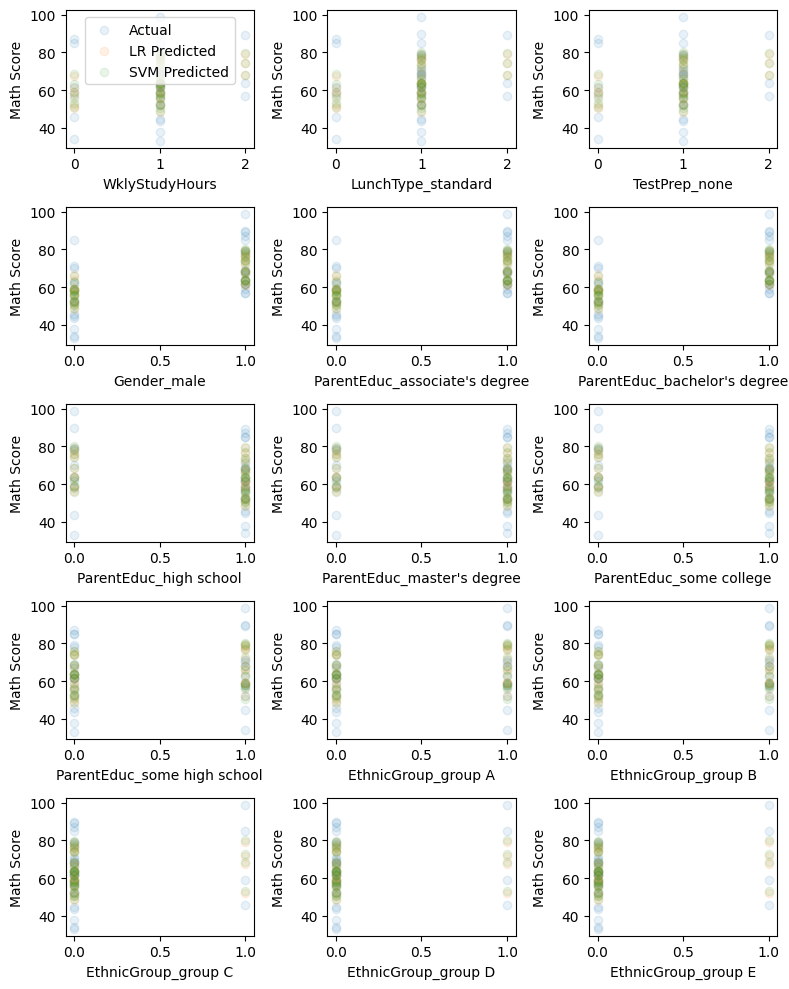

In [18]:
# Create figure
fig, axs = plt.subplots(nrows=5, ncols=3)

# Number of samples to plot
n = 30

# Loop through each set of axes
for i in range(5):
    for j in range(3):
        # Get the feature index
        idx = 3*i+j

        # Plot the actual values
        axs[i][j].scatter(X_test.iloc[:n,i], y_test[:n], alpha=0.1)

        # Plot the predicted values from the linear regression model
        axs[i][j].scatter(X_test.iloc[:n,i], lr_predictions[:n], alpha=0.1)

        # Plot the predicted values from the support vector machine model
        axs[i][j].scatter(X_test.iloc[:n,i], svm_predictions[:n], alpha=0.1)

        # Set labels
        axs[i][j].set_xlabel(X_test.columns[idx])
        axs[i][j].set_ylabel("Math Score")

axs[0][0].legend(["Actual", "LR Predicted", "SVM Predicted"])
fig.set_size_inches(8,10)
fig.tight_layout()


The predictions from both models tend to follow the trends observed in the data.

### Fitted vs Residuals Plot

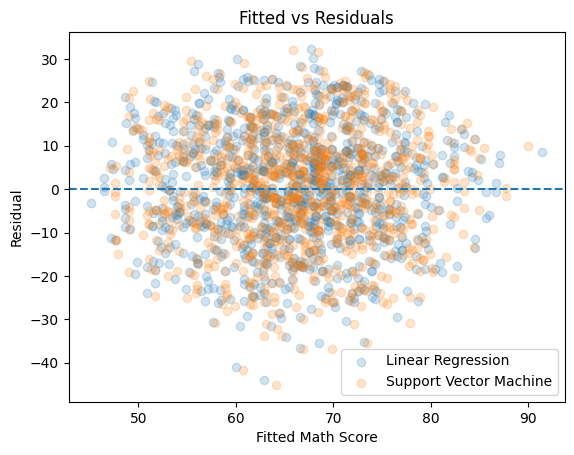

In [19]:
# Number of samples to plot
n = 1000

lr_residuals = y_test - lr_predictions
svm_residuals = y_test - svm_predictions

# Plot the fitted vs residual values for the linear regression model
plt.scatter(lr_predictions[:n], lr_residuals[:n], alpha=0.2)

# Plot the fitted vs residual values for the support vector machine model
plt.scatter(svm_predictions[:n], svm_residuals[:n], alpha=0.2)

# Plot horizontal line at zero
plt.axhline(linestyle="--")

# Plot labels
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted Math Score")
plt.ylabel("Residual")
plt.legend(["Linear Regression", "Support Vector Machine"])

Text(0.5, 0, 'Fitted Residual')

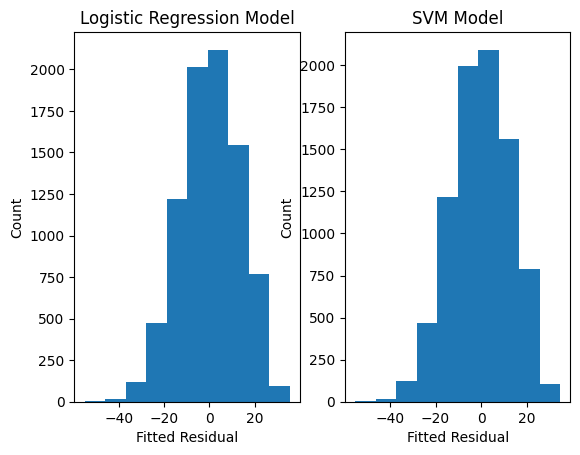

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.hist(lr_residuals)
ax1.set_title("Logistic Regression Model")
ax1.set_ylabel("Count")
ax1.set_xlabel("Fitted Residual")

ax2.hist(svm_residuals)
ax2.set_title("SVM Model")
ax2.set_ylabel("Count")
ax2.set_xlabel("Fitted Residual")

Residuals appear to be normally distributed with constant variance.

## 4. Evaluate the model

### Coefficient of determination ($R^2$)

In [10]:
# Evaluate the coefficient of determination for the linear regression model
lr_r2 = r2_score(y_test, lr_predictions)
lr_r2

0.27882233650158017

In [11]:
# Evaluate the coefficient of determination for the support vector machine model
svm_r2 = r2_score(y_test, svm_predictions)
svm_r2

0.27141914335691153

The linear regression model explains 27.9% of the variation in the math score data.

The support vector machine model explains 27.1% of the variation in the math score data.

### Root mean squared error (RMSE)

In [12]:
# Evaluate the root mean squared error of the linear regression model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_rmse

12.990889779885011

In [13]:
# Evaluate the root mean squared error of the support vector machine model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_rmse

13.057398015608193

The linear regression model had a lower mean squared error than the support vector machine model.

### Mean absolute error (MAE)

In [14]:
# Evaluate the mean absolute error of the linear regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mae

10.522224470459603

In [15]:
# Evaluate the mean absolute error of the support vector machine model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mae

10.580280377190652

The linear regression model had a lower mean absolute error than the support vector machine model.

### Summary

In [16]:
pd.DataFrame({
    "Model": ["Linear Regression", "Support Vector Machine"],
    "R^2": [lr_r2, svm_r2],
    "RMSE": [lr_rmse, svm_rmse],
    "MAE": [lr_mae, svm_mae]
})

,Model,R^2,RMSE,MAE
0,Linear Regression,0.278822,12.990890,10.522224
1,Support Vector Machine,0.271419,13.057398,10.580280


The linear regression model performed better than the support vector machine model in all metrics.

### Saving the model

In [17]:
# Save the linear regression model
pickle.dump(lr_model, open("outputs/lr-model.pkl", "wb"))

# Save the support vector machine model
pickle.dump(svm_model, open("outputs/svm-model.pkl", "wb"))

## 5. Summary

I first split the preprocessed exam score data into the test and training sets. I then trained both a linear regression model and a support vector machine (SVM) model on the training set using default settings. For both models, I set the response variable to the math score.

After training the model, I calculated the mean squared error (MSE) of the model on the test set. The linear regression model had a MSE of 168.8 and the SVM model had a MSE of 170.5. I also inspected the coefficients of the linear regression model and found that lunch type had the most significant contribution to the model. I plotted the relationship between each feature and the math score and compared the predictions to the actual data. I also found that the residuals were normally distributed with equal variance, which validates the assumption of the model.

To evaluate the models, I evaluated the coefficient of determination (R^2). The linear regression model achieved a higher R^2 than the SVM model, which means a higher proportion of the variance in the data is explained by the model. I also evaluated the root mean squared error (RMSE) and mean absolute error (MAE). The linear regression model achieved a lower RMSE and MAE than the SVM model.

Overall, the linear regression model performed better than the support vector machine model in predictions. However, the models were trained on default settings. For the next steps, I would tune the models to achieve higher accuracies. I could also change the preprocessing pipeline to add or remove features from the dataset.